In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import config
import utility.df
import utility.iolib
import utility.plotlib

#env = sys.argv[1] if len(sys.argv) > 2 else "dev"

In [2]:
# Setup configuration
cfg = config.ResearchConfig
time_format = cfg.CSV_TIME_FORMAT
date_format = cfg.CSV_DATE_FORMAT
cutoff_date = pd.to_datetime(cfg.CUTOFF_DATE, format=cfg.CSV_DATE_FORMAT)

# Retrieve data
df_subspt, _, _, _ = utility.iolib.retrieve_data(cfg)
print("Complete loading data for subscription and lesson history!")

Complete loading data for subscription and lesson history!


In [3]:
start_date = pd.to_datetime('2016-02-01')
end_date = pd.to_datetime('2016-04-01')
dates = pd.date_range(start=start_date, end=end_date, freq='D')
subspt_type = 'Monthly'
p_term = 24
p_unit = 'M'

survival_counts = np.zeros([len(dates), p_term])

i = 0
for date in dates:
    survival = utility.df.subspt_survival(df_subspt, subspt_type, date, p_term, p_unit)
    survival_counts[i,:] = np.array(survival.survival_count)
    i = i + 1

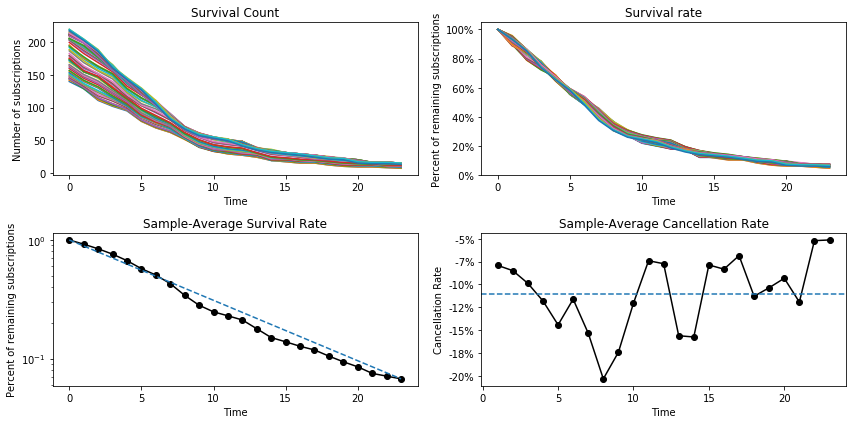

In [4]:
utility.plotlib.survival(survival_counts, cfg)